In [1]:
import mne
import numpy as np
import matplotlib.pyplot as plt
import os
import os.path as op
%matplotlib inline

In [3]:
mne.__version__

'0.15.2'

In [11]:
raw = mne.io.read_raw_brainvision("suj11_l5nap_day1.vhdr", preload=True)

Extracting parameters from suj11_l5nap_day1.vhdr...
Setting channel info structure...
Reading 0 ... 1858749  =      0.000 ...  1858.749 secs...


In [13]:
raw.info
raw.ch_names

[u'Fp1',
 u'Fz',
 u'F3',
 u'F7',
 u'FT9',
 u'FC5',
 u'FC1',
 u'C3',
 u'T7',
 u'CP5',
 u'CP1',
 u'Pz',
 u'P3',
 u'P7',
 u'O1',
 u'Oz',
 u'O2',
 u'P4',
 u'P8',
 u'TP10',
 u'CP6',
 u'CP2',
 u'Cz',
 u'C4',
 u'T8',
 u'FT10',
 u'FC6',
 u'FC2',
 u'F4',
 u'F8',
 u'Fp2',
 u'AF7',
 u'AF3',
 u'AFz',
 u'F1',
 u'F5',
 u'FT7',
 u'FC3',
 u'FCz',
 u'C1',
 u'C5',
 u'TP7',
 u'CP3',
 u'P1',
 u'P5',
 u'PO7',
 u'PO3',
 u'POz',
 u'PO4',
 u'PO8',
 u'P6',
 u'P2',
 u'CPz',
 u'CP4',
 u'TP8',
 u'C6',
 u'C2',
 u'FC4',
 u'FT8',
 u'F6',
 u'F2',
 u'LOc',
 u'ROc',
 u'Aux1',
 'STI 014']

In [12]:
raw.info["ch_names"][:10]

[u'Fp1', u'Fz', u'F3', u'F7', u'FT9', u'FC5', u'FC1', u'C3', u'T7', u'CP5']

In [6]:
mne.channels.get_builtin_montages()

['EGI_256',
 'GSN-HydroCel-128',
 'GSN-HydroCel-129',
 'GSN-HydroCel-256',
 'GSN-HydroCel-257',
 'GSN-HydroCel-32',
 'GSN-HydroCel-64_1.0',
 'GSN-HydroCel-65_1.0',
 'biosemi128',
 'biosemi16',
 'biosemi160',
 'biosemi256',
 'biosemi32',
 'biosemi64',
 'easycap-M1',
 'easycap-M10',
 'mgh60',
 'mgh70',
 'standard_1005',
 'standard_1020',
 'standard_alphabetic',
 'standard_postfixed',
 'standard_prefixed',
 'standard_primed']

In [7]:
raw.set_eeg_reference("average", projection=False)
events = mne.find_events(raw)

Applying average reference.


# Display one channel

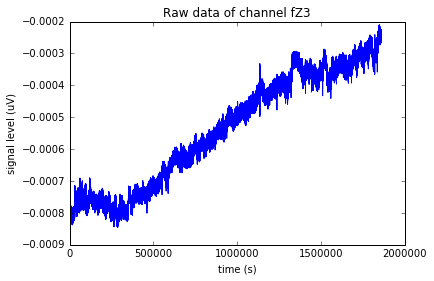

In [8]:
plt.plot(raw._data[2])
plt.xlabel('time (s)')
plt.ylabel('signal level (uV)')
plt.title('Raw data of channel fZ3')
plt.show()

# Histogram

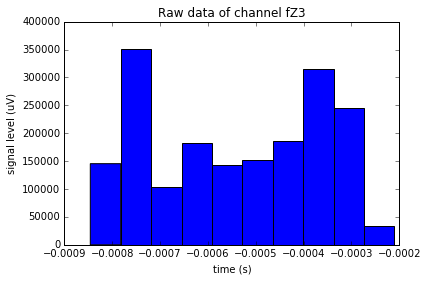

In [9]:
plt.hist(raw._data[2])
plt.xlabel('time (s)')
plt.ylabel('signal level (uV)')
plt.title('Raw data of channel fZ3')
plt.show()


In [10]:
raw._data[2].shape

(1858750L,)

# ALL Channel

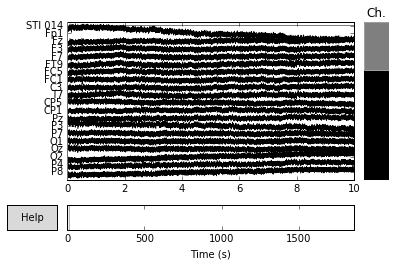

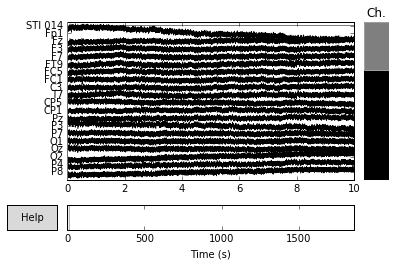

In [14]:
raw.plot()

In [ ]:
raw.plot_psd(tmax=np.inf, average=False);

Effective window size : 2.048 (s)


# Reading fif data

In [2]:
epoch=mne.read_epochs('C:\\Users\\new user\\EEG data\\data\\Ex10_Suj1_Run1-epo.fif',preload=True)

Reading C:\Users\new user\EEG data\data\Ex10_Suj1_Run1-epo.fif ...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 61) active
    Found the data of interest:
        t =       0.00 ...    1400.00 ms
        0 CTF compensation matrices available
280 matching events found
Created an SSP operator (subspace dimension = 1)
280 matching events found
Created an SSP operator (subspace dimension = 1)
1 projection items activated


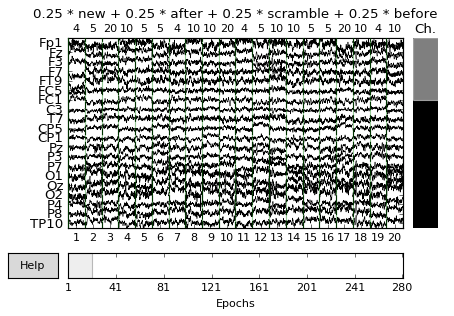

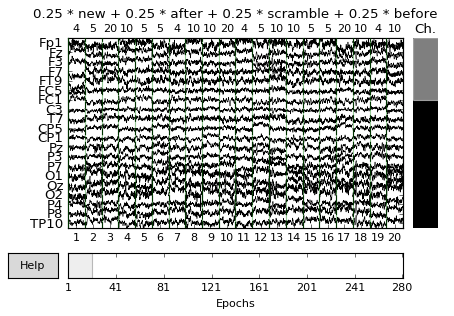

In [3]:
epoch.plot()

In [22]:
print(epoch[1:5])

<EpochsFIF  |  n_events : 4 (all good), tmin : 0.0 (s), tmax : 1.4 (s), baseline : (0.0, 0.0), ~2.7 MB, data loaded,
 u'after': 1, u'before': 1, u'scramble': 2>


In [12]:
print('Number of events:', len(epoch))

('Number of events:', 280)


In [24]:
print(epoch.event_id)

{u'new': 4, u'after': 20, u'scramble': 5, u'before': 10}


In [27]:
print(epoch[u'new'])

<EpochsFIF  |  n_events : 71 (all good), tmin : 0.0 (s), tmax : 1.4 (s), baseline : (0.0, 0.0), ~46.4 MB, data loaded>


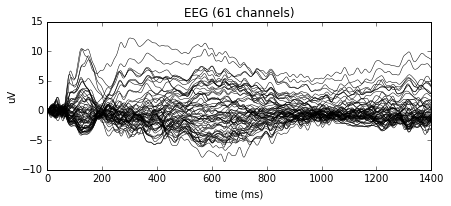

In [38]:
Newaverage=epoch[u'new'].average()
_=f.suptitle(u'new', fontsize=20)
_=Newaverage.plot()

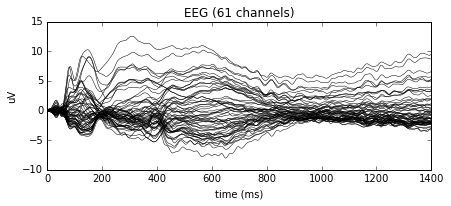

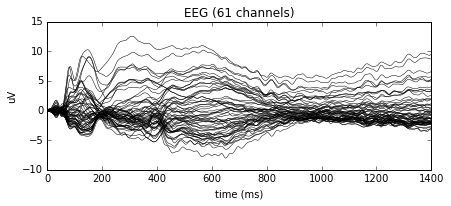

In [39]:
epoch.average().plot()

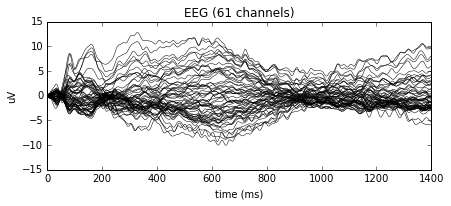

In [42]:
afteraverage=epoch[u'after'].average()
_=afteraverage.plot()

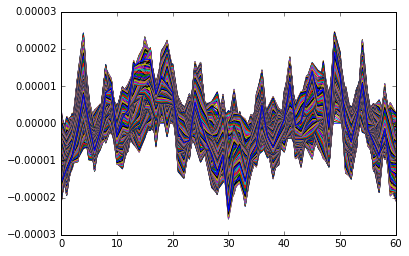

In [45]:
plt.plot(epoch._data[2])
plt.show()

In [47]:
print(epoch._data[2])

[[  5.27098219e-10  -1.56318582e-07  -3.84296520e-07 ...,  -1.75638277e-05
   -1.68137008e-05  -1.60985825e-05]
 [  1.02723018e-10  -4.80447942e-07  -9.47688470e-07 ...,  -1.17235038e-05
   -1.20443979e-05  -1.23341766e-05]
 [  5.09777430e-11  -2.25760321e-07  -4.38138606e-07 ...,  -8.01218338e-06
   -8.43366028e-06  -8.78956291e-06]
 ..., 
 [  4.74321347e-11  -7.65740864e-08  -1.64737223e-07 ...,  -1.45008452e-06
   -1.40310616e-06  -1.43583986e-06]
 [  1.68608093e-10   8.51267956e-08   1.28338350e-07 ...,  -1.26185048e-05
   -1.26925984e-05  -1.26741094e-05]
 [  7.60314798e-11  -3.25528252e-07  -6.32202947e-07 ...,  -1.32005814e-05
   -1.35782862e-05  -1.39127684e-05]]


[[  5.27098219e-10  -9.73831343e-07  -1.76217300e-06 ...,  -6.31071429e-06
   -6.09984988e-06  -5.70766384e-06]
 [  1.02723018e-10  -3.79152775e-07  -6.96565353e-07 ...,   3.05908931e-06
    2.71744660e-06   2.38832331e-06]
 [  5.09777430e-11  -5.58519682e-07  -1.08853574e-06 ...,  -4.63479931e-06
   -4.81322774e-06  -4.89089394e-06]
 ..., 
 [  4.74321347e-11   5.50452673e-07   1.12830302e-06 ...,   6.17925276e-06
    6.33656612e-06   6.47403544e-06]
 [  1.68608093e-10   4.46319168e-07   9.95240312e-07 ...,   5.42837394e-06
    5.50373091e-06   5.68939617e-06]
 [  7.60314798e-11  -7.91795949e-08  -1.46561165e-07 ...,   6.08309371e-06
    5.57730539e-06   5.06075343e-06]]
[[  5.27098219e-10  -9.16250906e-07  -1.89274948e-06 ...,  -1.36059279e-05
   -1.28193012e-05  -1.21823453e-05]
 [  1.02723018e-10   1.24614849e-07   2.55229620e-07 ...,  -7.00746380e-06
   -6.99818589e-06  -7.08189900e-06]
 [  5.09777430e-11  -9.98593574e-08  -1.63778228e-07 ...,  -5.39578099e-06
   -5.05562162e-06  -

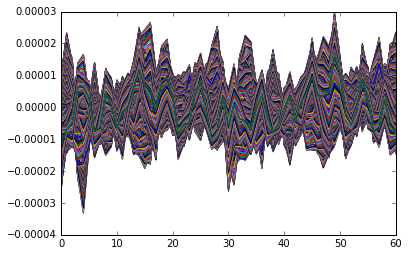

In [62]:
for ep in epoch[:2]:
    print(ep)
    plt.plot(ep)

In [4]:
print(epoch.event_id)

{u'new': 4, u'after': 20, u'scramble': 5, u'before': 10}


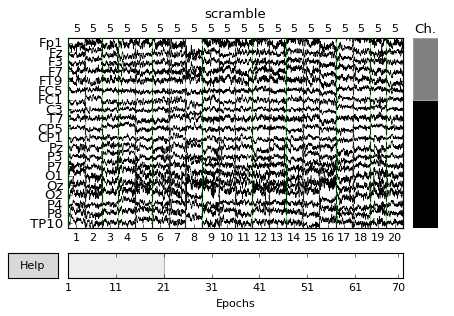

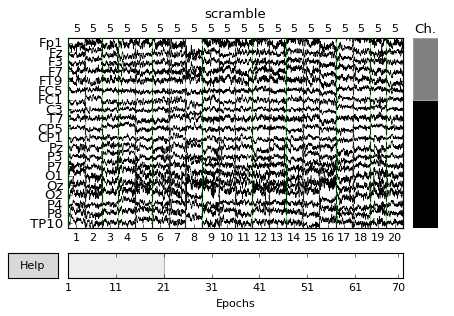

In [5]:
epoch[u'scramble'].plot()

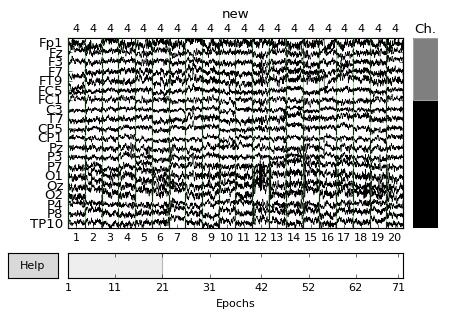

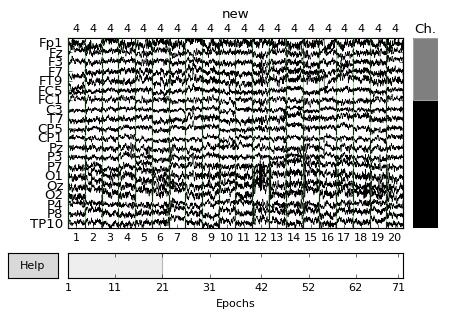

In [6]:
epoch[u'new'].plot()

In [8]:
print(epoch.metadata.head(10))

AttributeError: 'EpochsFIF' object has no attribute 'metadata'

In [19]:
epoch.events

array([[   6065,       0,       4],
       [  22649,       0,       5],
       [  24865,       0,      20],
       [  28615,       0,      10],
       [  32065,       0,       5],
       [  37498,       0,       5],
       [  42081,       0,       4],
       [  45348,       0,      10],
       [  49981,       0,      10],
       [  53481,       0,      20],
       [  57765,       0,       4],
       [  61848,       0,       5],
       [  64398,       0,      10],
       [  66082,       0,      10],
       [  70749,       0,       5],
       [  74249,       0,       5],
       [  76699,       0,      20],
       [  79749,       0,      10],
       [  82182,       0,       4],
       [  84182,       0,      10],
       [  87716,       0,       4],
       [  92149,       0,       5],
       [  94199,       0,       5],
       [  99816,       0,       5],
       [ 106784,       0,       5],
       [ 110618,       0,       5],
       [ 113551,       0,       4],
       [ 116584,       0,   

In [18]:
epoch.ch_names

[u'Fp1',
 u'Fz',
 u'F3',
 u'F7',
 u'FT9',
 u'FC5',
 u'FC1',
 u'C3',
 u'T7',
 u'CP5',
 u'CP1',
 u'Pz',
 u'P3',
 u'P7',
 u'O1',
 u'Oz',
 u'O2',
 u'P4',
 u'P8',
 u'TP10',
 u'CP6',
 u'CP2',
 u'Cz',
 u'C4',
 u'T8',
 u'FT10',
 u'FC6',
 u'FC2',
 u'F4',
 u'F8',
 u'Fp2',
 u'AF7',
 u'AF3',
 u'AFz',
 u'F1',
 u'F5',
 u'FT7',
 u'FC3',
 u'FCz',
 u'C1',
 u'C5',
 u'TP7',
 u'CP3',
 u'P1',
 u'P5',
 u'PO7',
 u'PO3',
 u'POz',
 u'PO4',
 u'PO8',
 u'P6',
 u'P2',
 u'CPz',
 u'CP4',
 u'TP8',
 u'C6',
 u'C2',
 u'FC4',
 u'FT8',
 u'F6',
 u'F2']

280 matching events found
Projection vector "Average EEG reference" has magnitude 0.02 (should be unity), applying projector with 1/61 of the original channels available may be dangerous, consider recomputing and adding projection vectors for channels that are eventually used. If this is intentional, consider using info.normalize_proj()
Created an SSP operator (subspace dimension = 1)
1 projection items activated
0 bad epochs dropped


<ipython-input-25-51e9a8714c45>:1: RuntimeWarning: Projection vector "Average EEG reference" has magnitude 0.02 (should be unity), applying projector with 1/61 of the original channels available may be dangerous, consider recomputing and adding projection vectors for channels that are eventually used. If this is intentional, consider using info.normalize_proj()
  epoch.plot_image()


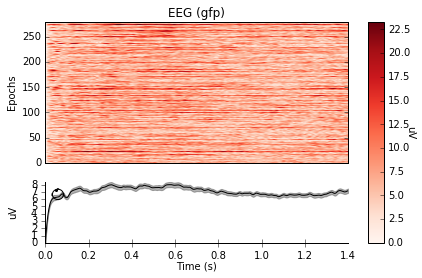

In [25]:
epoch.plot_image()

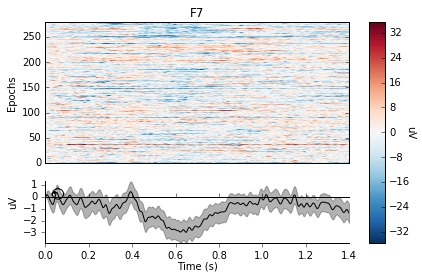

In [26]:
epoch.plot_image(picks=3)

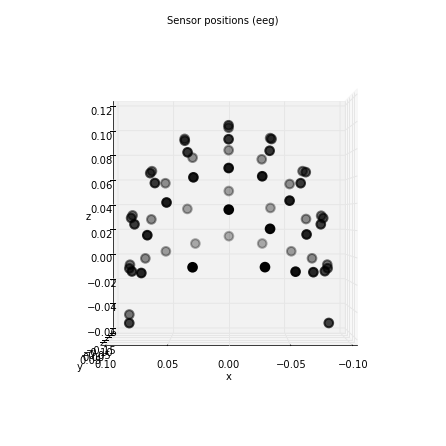

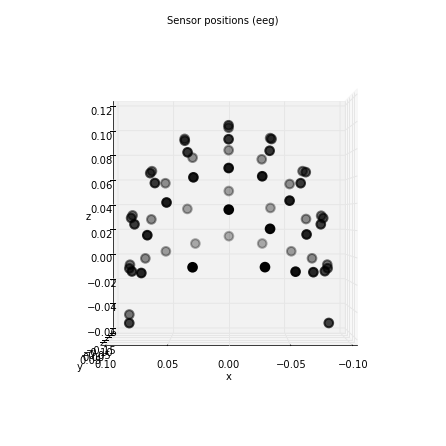

In [28]:
epoch.plot_sensors(kind='3d')

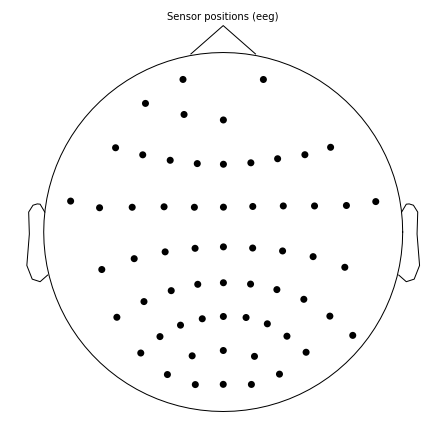

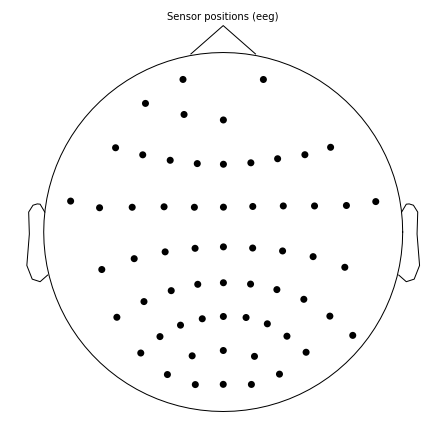

In [29]:
epoch.plot_sensors()

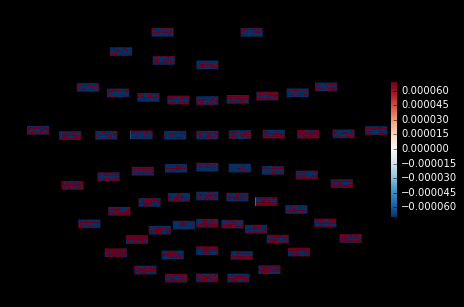

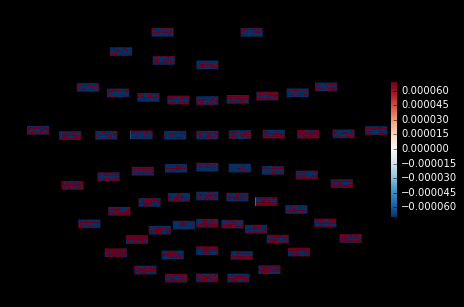

In [30]:
epoch.plot_topo_image()

In [30]:
print(epoch[:1])

<EpochsFIF  |  n_events : 1 (all good), tmin : 0.0 (s), tmax : 1.4 (s), baseline : (0.0, 0.0), ~800 kB, data loaded>


In [29]:
print(epoch._data[1])

[[  5.27098219e-10  -9.16250906e-07  -1.89274948e-06 ...,  -1.36059279e-05
   -1.28193012e-05  -1.21823453e-05]
 [  1.02723018e-10   1.24614849e-07   2.55229620e-07 ...,  -7.00746380e-06
   -6.99818589e-06  -7.08189900e-06]
 [  5.09777430e-11  -9.98593574e-08  -1.63778228e-07 ...,  -5.39578099e-06
   -5.05562162e-06  -4.82932073e-06]
 ..., 
 [  4.74321347e-11  -7.84032144e-09  -7.66528099e-09 ...,   2.38421132e-06
    2.45735759e-06   2.54110792e-06]
 [  1.68608093e-10  -2.22633866e-07  -3.64405483e-07 ...,  -4.75772316e-06
   -5.31807996e-06  -5.86582455e-06]
 [  7.60314798e-11   6.87937021e-08   1.44169403e-07 ...,  -7.72223933e-06
   -7.86839042e-06  -8.05518930e-06]]


In [33]:
print(epoch.event_id)

{u'new': 4, u'after': 20, u'scramble': 5, u'before': 10}


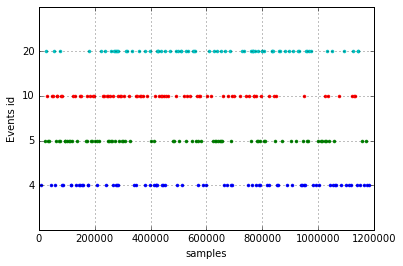

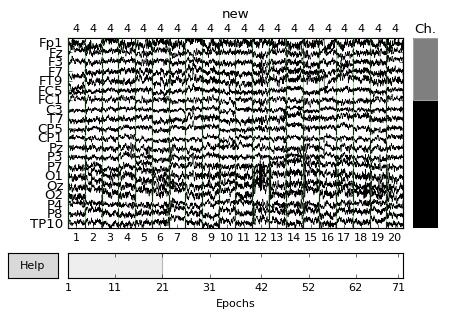

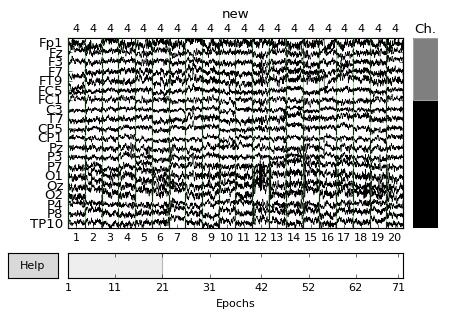

In [49]:
mne.viz.plot_events(epoch.events)
epoch[u'new'].plot()